# Data Scientist Associate Practical Exam

## Company Background
EMO is a manufacturer of motorcycles. The company successfully launched its first electric moped in India in 2019. The product team knows how valuable owner reviews are in making improvements to their mopeds. 

Unfortunately they often get reviews from people who never owned the moped. They don’t want to consider this feedback, so would like to find a way to identify reviews from these people. They have obtained data from other mopeds, where they know if the reviewer owned the moped or not. They think this is equivalent to their own reviews.   


## Customer Question
Your manager has asked you to answer the following:
- Can you predict which reviews come from people who have never owned the moped before?  


## Dataset
The dataset contains reviews about other mopeds from a local website. The data you will use for this analysis can be accessed here: `"data/moped.csv"`

| Column Name      | Criteria                                                                                                                                                                    |
|------------------|-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| Used it for      | Character, the purpose of the electric moped for the user, one of “Commuting”, “Leisure”.                                                                                   |
| Owned for        | Character, duration of ownership of vehicle one of  “<= 6 months”, “> 6 months”, “Never Owned”.  Rows that indicate ownership should be combined into the category “Owned”. |
| Model name       | Character, the name of the electric moped.                                                                                                                                   |
| Visual Appeal    | Numeric, visual appeal rating (on a 5 point scale, replace missing values with 0).                                                                                           |
| Reliability      | Numeric, reliability rating (on a 5 point scale, replace missing values with 0).                                                                                             |
| Extra Feature    | Numeric, extra feature rating (on a 5 point scale, replace missing values with 0).                                                                                         |
| Comfort          | Numeric, comfort rating (on a 5 point scale, replace missing values with 0).                                                                                                 |
| Maintenance cost | Numeric, maintenance cost rating (on a 5 point scale, replace missing values with 0).                                                                                        |
| Value for money  | Numeric, value for money rating (on a 5 point scale, replace missing values with 0).                                                                                         |

# Data Scientist Associate Practical Exam Submission




## Data Validation

My first task was to load the data so I could dive into the information. After loading the libraries, I needed to look the data qualities:
- The data has 9 columns and 713 rows.
- Two types, Object and float64.

For validation criteria I did the following steps:
- **Used it for** column: I left the column type "Object" as it was because it matched the criteria in the Dataset table.
- **Owned for** column: I combined the "<= 6 months" and "> 6 months" into a category "Owned" and left "Never Owned" as it was and changed its type into a **category** type.
- **Model Name** column: I left the column type "Object" as it was because it matched the criteria in the Dataset table.
- **Visual Appeal** column: I have changed the data type from float64 to **int8** because the numbers don't have decimals and don't exceed the numeric range of (-128,127), also this column doesn't have missing values.
-  **Reliability** column: I have changed the data type from float64 to **int8** because the numbers don't have decimals and don't exceed the numeric range of (-128,127), also this column doesn't have missing values.
- **Extra Features** column: I have changed the data type from float64 to **int8** because the numbers don't have decimals and don't exceed the numeric range of (-128,127), I have filled the missing values with 0.
- **Comfort** column: I have changed the data type from float64 to **int8** because the numbers don't have decimals and don't exceed the numeric range of (-128,127), I have filled the missing values with 0.
- **Maintenance cost** column: I have changed the data type from float64 to **int8** because the numbers don't have decimals and don't exceed the numeric range of (-128,127), I have filled the missing values with 0.
- **Value for Money** column: I have changed the data type from float64 to **int8** because the numbers don't have decimals and don't exceed the numeric range of (-128,127), I have filled the missing values with 0.


- I have detected that four columns have missing values, however these three columns: "Extra Features", "Maintenance cost" and "Value for money" have most of the missing values. The total number of missing values is 1613.
- I have reduced the storage memory with the changes in the DataFrame by 42.73% and now there are no missing values.

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.min_rows= 10

moped = pd.read_csv("data/moped.csv")
print(moped.info())
print("Quantity of missing values:\n",moped.isna().sum().sum())
print("Memory usage:\n",moped.memory_usage(deep=True).sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 713 entries, 0 to 712
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Used it for       713 non-null    object 
 1   Owned for         713 non-null    object 
 2   Model Name        713 non-null    object 
 3   Visual Appeal     713 non-null    float64
 4   Reliability       713 non-null    float64
 5   Extra Features    183 non-null    float64
 6   Comfort           510 non-null    float64
 7   Maintenance cost  176 non-null    float64
 8   Value for Money   370 non-null    float64
dtypes: float64(6), object(3)
memory usage: 50.3+ KB
None
Quantity of missing values:
 1613
Memory usage:
 180841


### After data validation criteria

In [32]:
# Transforming data with the given criteria

# Fill nan columns
moped["Visual Appeal"] = moped["Visual Appeal"].astype("int8")
moped["Reliability"] = moped["Reliability"].astype("int8")
moped["Extra Features"] = moped["Extra Features"].fillna(0).astype("int8")
moped["Comfort"] = moped["Comfort"].fillna(0).astype("int8")
moped["Maintenance cost"] = moped["Maintenance cost"].fillna(0).astype("int8")
moped["Value for Money"] = moped["Value for Money"].fillna(0).astype("int8")
# Changing the category names
OB = {"<= 6 months":"Owned", 
      "> 6 months":"Owned",
      "Never owned":"Never owned"}
# Turning "Owned for" into a category column
moped["Owned for"] = moped["Owned for"].map(OB).astype("category")


# I have reduced the storage memory by 42.73%
display(moped)
print(moped.info())
print("Memory usage:\n",moped.memory_usage(deep=True).sum())

,Used it for,Owned for,Model Name,Visual Appeal,Reliability,Extra Features,Comfort,Maintenance cost,Value for Money
0,Commuting,Never owned,TVS iQube,3,4,0,4,0,1
1,Leisure,Owned,TVS iQube,3,1,0,3,0,3
2,Commuting,Owned,TVS iQube,4,4,0,5,0,2
3,Commuting,Owned,TVS iQube,1,1,0,1,0,1
4,Commuting,Owned,TVS iQube,3,4,0,3,0,2
...,...,...,...,...,...,...,...,...,...
708,Commuting,Owned,Gemopai Ryder,2,2,0,2,0,3
709,Leisure,Owned,Gemopai Ryder,5,5,5,0,5,0
710,Commuting,Owned,Gemopai Ryder,2,2,3,0,1,0
711,Commuting,Owned,Gemopai Ryder,4,4,0,4,0,5


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 713 entries, 0 to 712
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Used it for       713 non-null    object  
 1   Owned for         713 non-null    category
 2   Model Name        713 non-null    object  
 3   Visual Appeal     713 non-null    int8    
 4   Reliability       713 non-null    int8    
 5   Extra Features    713 non-null    int8    
 6   Comfort           713 non-null    int8    
 7   Maintenance cost  713 non-null    int8    
 8   Value for Money   713 non-null    int8    
dtypes: category(1), int8(6), object(2)
memory usage: 16.3+ KB
None
Memory usage:
 103652


## Exploratory Analysis

Since my task is to predict the ratings coming from people who have never used the moped, I need to see if the dataset is balanced. 

From my **Graph 1: Percentage of people who have owned a moped before** I can see that only 19% of ratings came from people who have never owned the moped before (so I am going to handle this unbalanced data later). Meanwhile 81% of the ratings are coming from Owners.

After, in **Graph 2: Distribution of how moped owners used their moped**, I found that 65% of moped owners rated that they were using their moped for "Commuting" and 15% of moped owners were using their moped for "Leisure". On the other hand, 12% of "non-owners" rated that they were using their moped for "Commuting" and 8% of "non-owners" rated that they were using their moped for "Leisure".

In **Graph 3: Model preferences based on their name** I found that the model "Hero Electric Flash" was rated the most number of times and that the model "BGauss B8" was rated the least number of times.

In the **Graph 4: Distribution of rates according to "Owned for"**  I can see that the "non-owners" rated the model "Tork Kratos" the most times and rated the model "Hero Electric NYX" the least number of times. To dive into ratings, I must keep in mind that the columns "Extra Features", "Maintenance cost" and "Value for Money" have more than 1/2 data of missing values.

According to **Graph 5: Distribution of ratings** it is clear that "Visual Appeal" and "Reliability" are the best rated because they received higher ratings starting from 2 to 5. "Comfort" has a better distribution of ratings from 0 to 5.

In **Graph 6: Distribution of ratings Commuting/Leisure** I can see that people who are using the moped for "Leisure" are rating it higher than the people who are using the moped for "Commuting".

What about the rating from the people that own the moped? **Graph 7: Distribution of rates according to Owned for** shows the following:
- "Extra Features", "Maintenance cost" and "Value for Money" contain missing values and the highest rated value from "owners" and "non-owners" is 0.
- "Visual Appeal" has the highest rating values from "owners" and "non-owners".
- "Reliability" and "Comfort" the "non-owners" are rating more with 5 but a fewer quantity of 0 meanwhile the "owners" are rating more 0s than 5s.

The behavior in data is clearer in **Graph 8: Mean of ratings** where I am comparing the mean ratings from "owners" and "non-owners".

Exploring correlation from **Graphs 9-11** I can see that some columns have positive correlations, such as Comfort and Value for Money by "owners".

### Percentage of owners
I observe that 19% of ratings came from people who have never owned the product. On the other hand, 81% of ratings came from people who already owned the moped products. This means the data is unbalanced.

In the next graph let's see how these people have expressed the use they have given to the moped and the rating they have given it according to different areas.

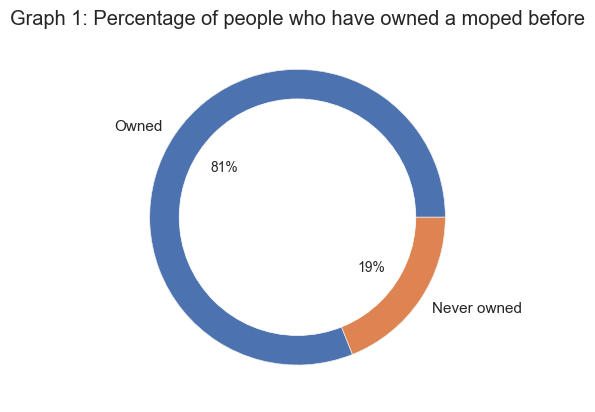

In [33]:
# Comparative of people who has owned the product
import matplotlib.style as style

style.use("ggplot")
plt.pie(moped["Owned for"].value_counts(),labels=["Owned","Never owned"],colors=sns.color_palette("deep"),autopct='%.0f%%')
circle=plt.Circle( (0,0), 0.8, color='white')
p=plt.gcf()
p.gca().add_artist(circle)
plt.title("Graph 1: Percentage of people who have owned a moped before")
plt.show()

### Distribution of use
When I observed the distribution of the **"Owned for"** column I can see the following:
- People who have never owned a moped are using it more for commuting than for leisure.
- "Owners" are using a moped more for commuting than for leisure. Leisure use is almost 1/4 from the commuting total amount.


When I observed the distribution of the **"Used it for"** column I can see that 77% of people are using the moped for commuting and 23% for leisure.


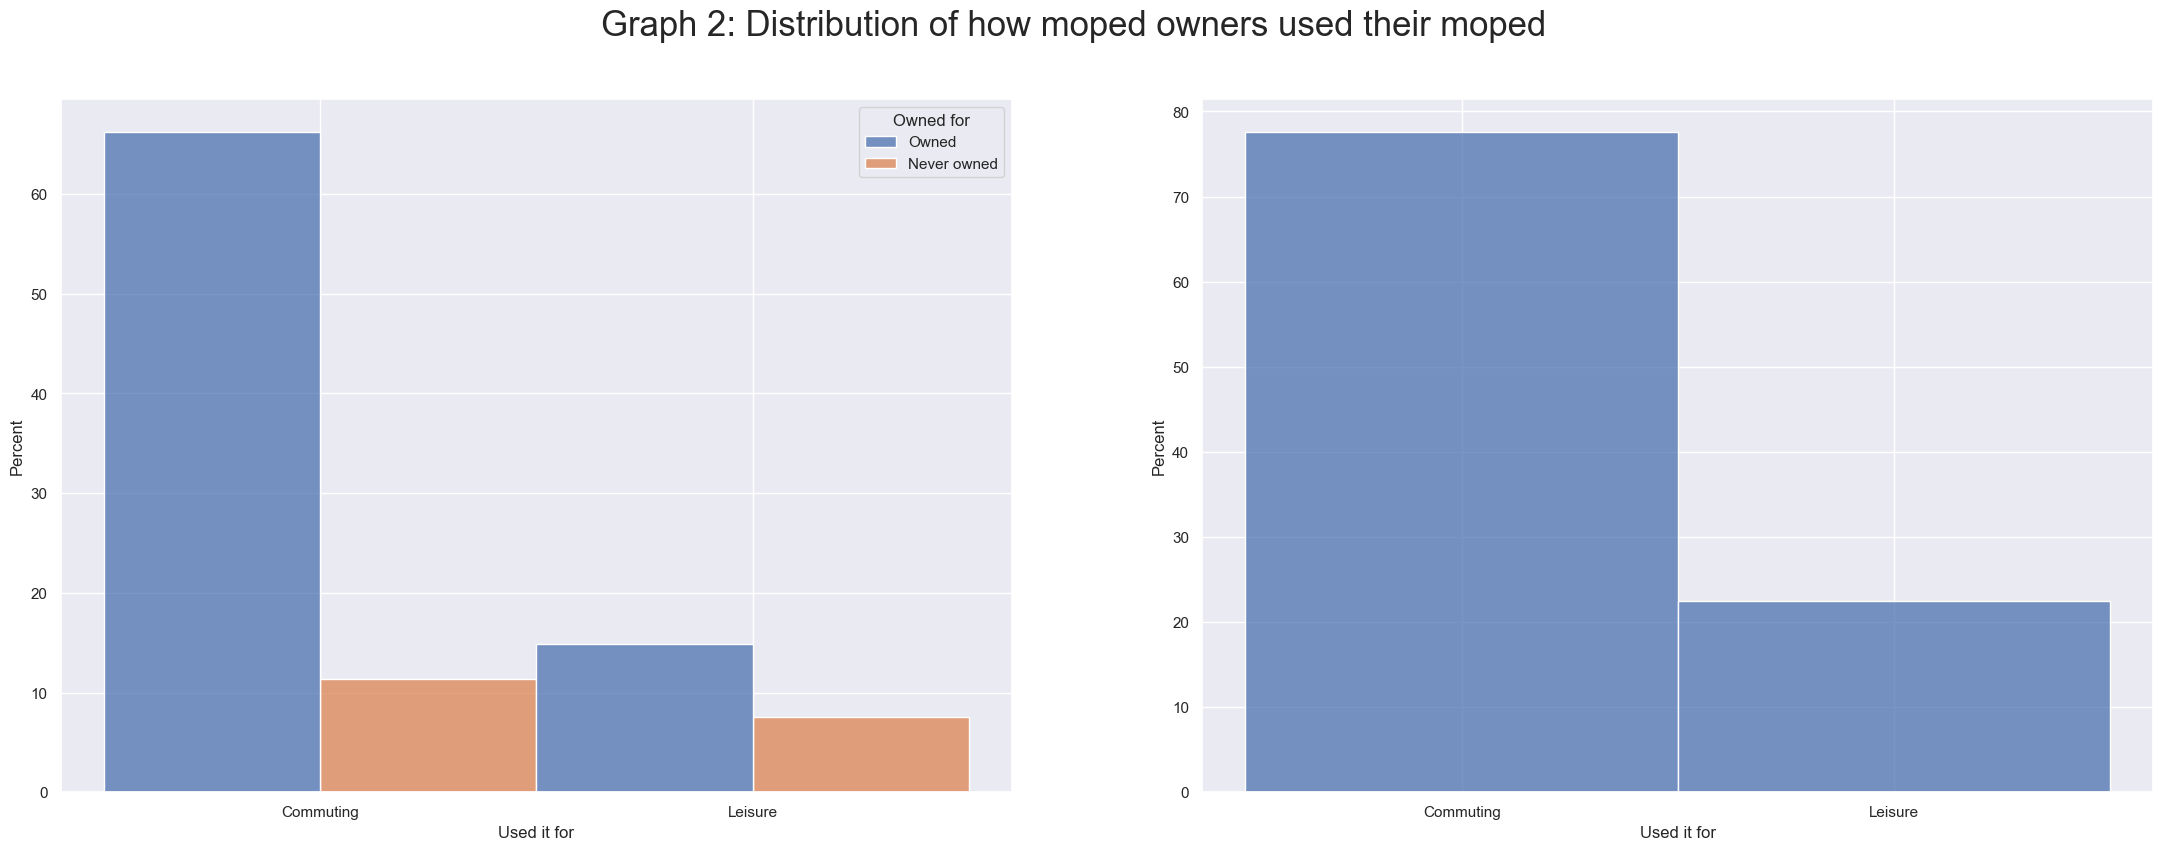

In [34]:
# The distribution of use
style.use("ggplot")
sns.set(font_scale=1)
fig, axes = plt.subplots(1,2,figsize=(27,9))
#sns.countplot(x="Owned for", hue="Used it for",data=moped,ax=axes[0], order=["Owned", "Never owned"])
sns.histplot(x="Used it for",data=moped,ax=axes[1], stat="percent")
sns.histplot(x="Used it for",data=moped,ax=axes[0], stat="percent", 
             hue="Owned for", multiple="dodge",hue_order=["Owned", "Never owned"])
fig.suptitle("Graph 2: Distribution of how moped owners used their moped",fontsize=25)
plt.show()

### Preferences of the models based on their name
Let's now look at the preferences of the models based on their name. From the data I can observe that most people decided to rate 5 models, from these 5 models “Hero Electric Flash” was the most rated.

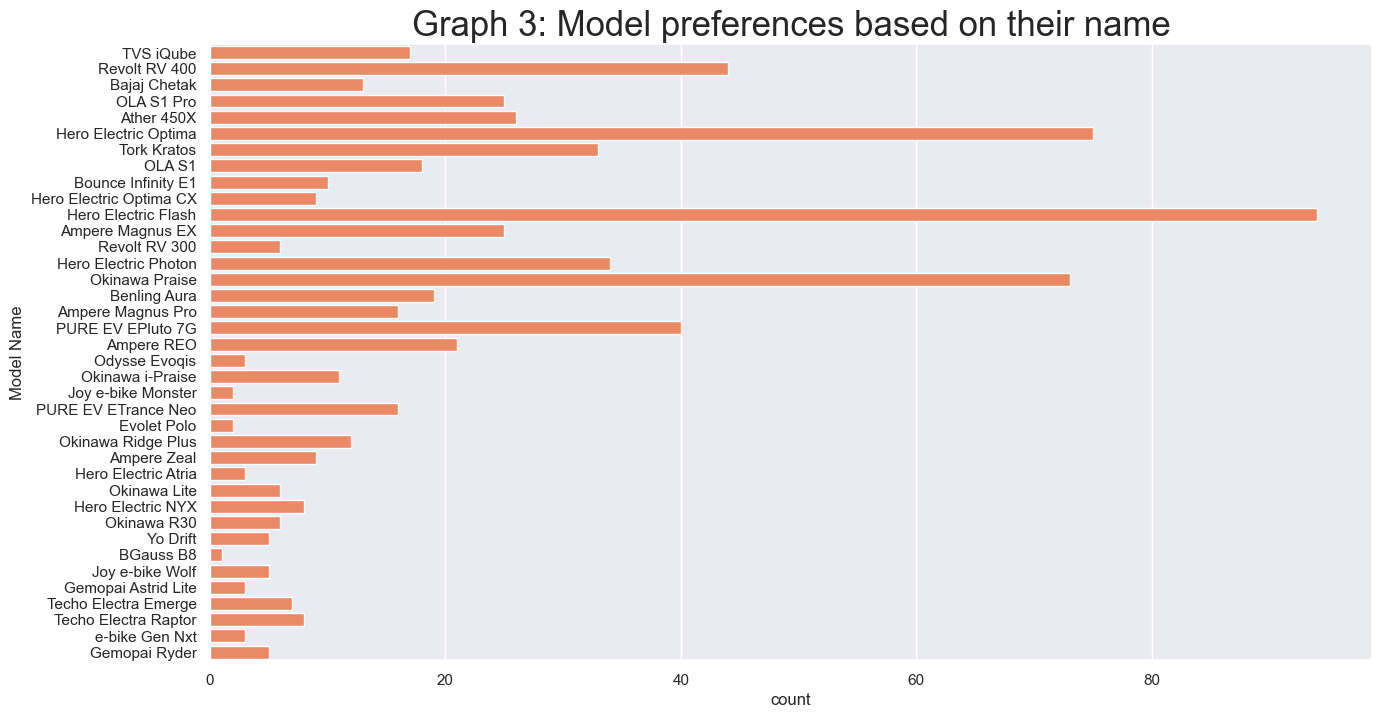

In [35]:
plt.figure(figsize=(15,8))
sns.countplot(y="Model Name", data=moped,color="coral")
plt.title("Graph 3: Model preferences based on their name",fontsize=25)
plt.show()

### Preferences of models between users
Now let's explore the behavior of moped users. 
The people who have never owned a moped are more likely to give a rating for the model "Tork Kratos". In contrast for people who have owned a moped, the model "Tork Kratos" is in 22nd place.


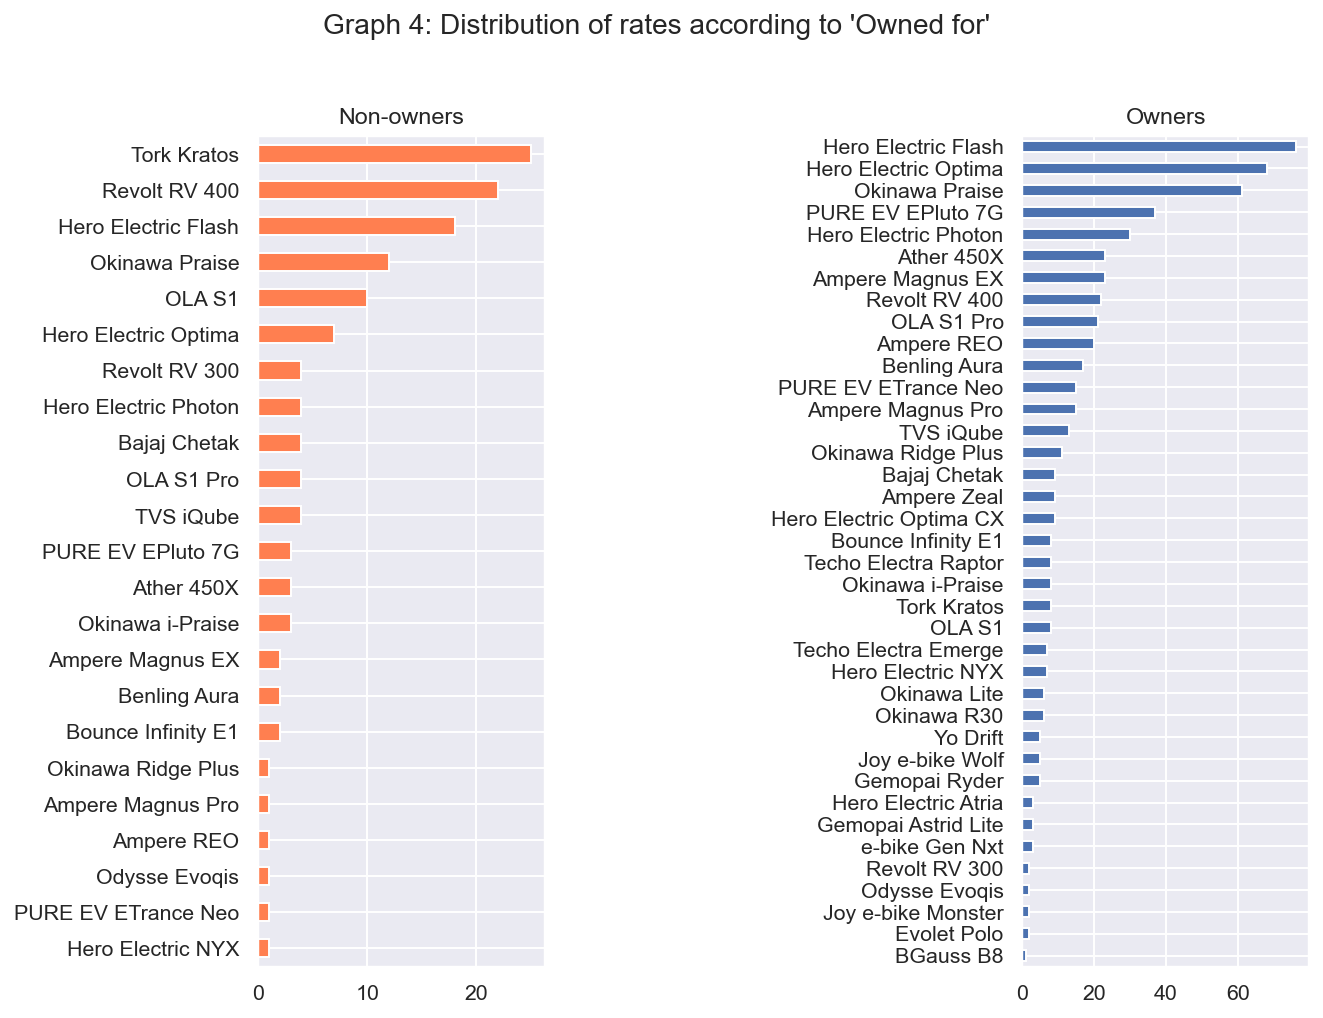

In [36]:
# The behavior of moped's users
owd = moped[moped["Owned for"]== "Owned"]
nowd = moped[moped["Owned for"]=="Never owned"]
fig, axes = plt.subplots(1,2,figsize=(2,2), dpi=140)
fig.tight_layout()
owd["Model Name"].value_counts(ascending=True).plot.barh(label="Owned",figsize=(15,15),ax=axes[1]).set_title("Owners")
nowd["Model Name"].value_counts(ascending=True).plot.barh(color="coral",label="Never Owned",figsize=(12,9),ax=axes[0]).set_title("Non-owners")
fig.suptitle("Graph 4: Distribution of rates according to 'Owned for'")
plt.show()

### Distribution of ratings
Now with the exploration of the ratings I have some clear observations:
1. First place for positive ratings is for "Visual Appeal", second place is "Reliability".
2. "Comfort" is the only column that has values well distributed from 0 to 5.
3. "Extra Features" and "Maintenance cost" are the columns with the most missing values.
4. The mean of people who are rating "Value for Money" is 1.

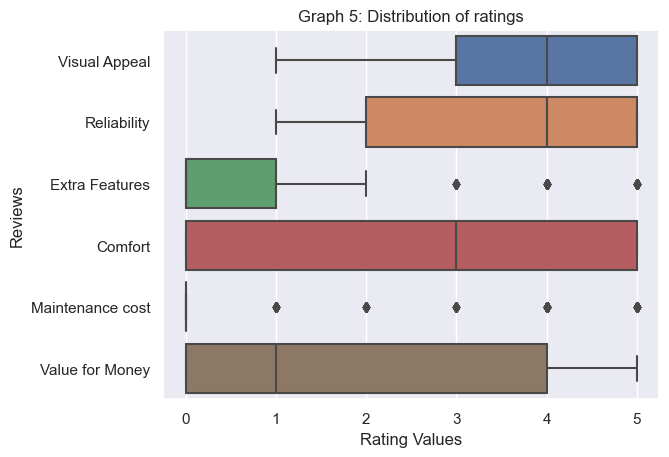

In [37]:
sns.set(font_scale=1)
df1=moped[["Visual Appeal", "Reliability", "Extra Features", "Comfort", "Maintenance cost", "Value for Money"]] 
g= sns.boxplot(y="variable", x="value", data=pd.melt(df1))
g.set_title("Graph 5: Distribution of ratings")
g.set(xlabel="Rating Values", ylabel="Reviews")
plt.show()

### Distribution of ratings according to use
Let's see how ratings are distributed between moped users who use it for commuting and leisure:
1. In "Visual Appeal" and "Reliability" people who use the moped for leisure rated higher than people who use the moped for commuting.
2. "Comfort" ratings are lower from people who use the moped for commuting, probably the more use the less comfort they perceive.
3. "Value for Money" rating is very low for both, but let's recall that in my dataframe this column has almost half of the missing values, same for "Extra Features" and "Maintenance cost".

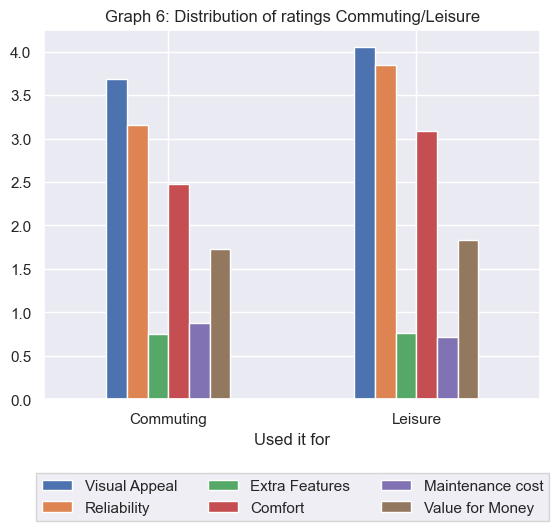

In [38]:
# Let's check mean ratings on Use
df_mean_rating= moped.drop(columns= ["Model Name"]).groupby("Used it for").mean()
df_mean_rating.plot(kind="bar")
plt.legend(loc= "lower center", bbox_to_anchor=(0.5, -0.35),
          ncol=3, fancybox=False)
plt.xticks(rotation="0")
plt.title("Graph 6: Distribution of ratings Commuting/Leisure")

plt.show()

### Distribution of ratings according to owners
From this graph I can observe:
1. Real users have mostly rated 0s for the Value for Money, however people who have never owned a moped also rated it mostly with 0s.
2. People who have own the moped rated with more 0s and 5s in the Reliability rating.
3. From the Extra Features and Maintenance cost most of the ratings are missing values.
4. From the Comfort column I can see that it has been mostly rated as 0s and 5s.

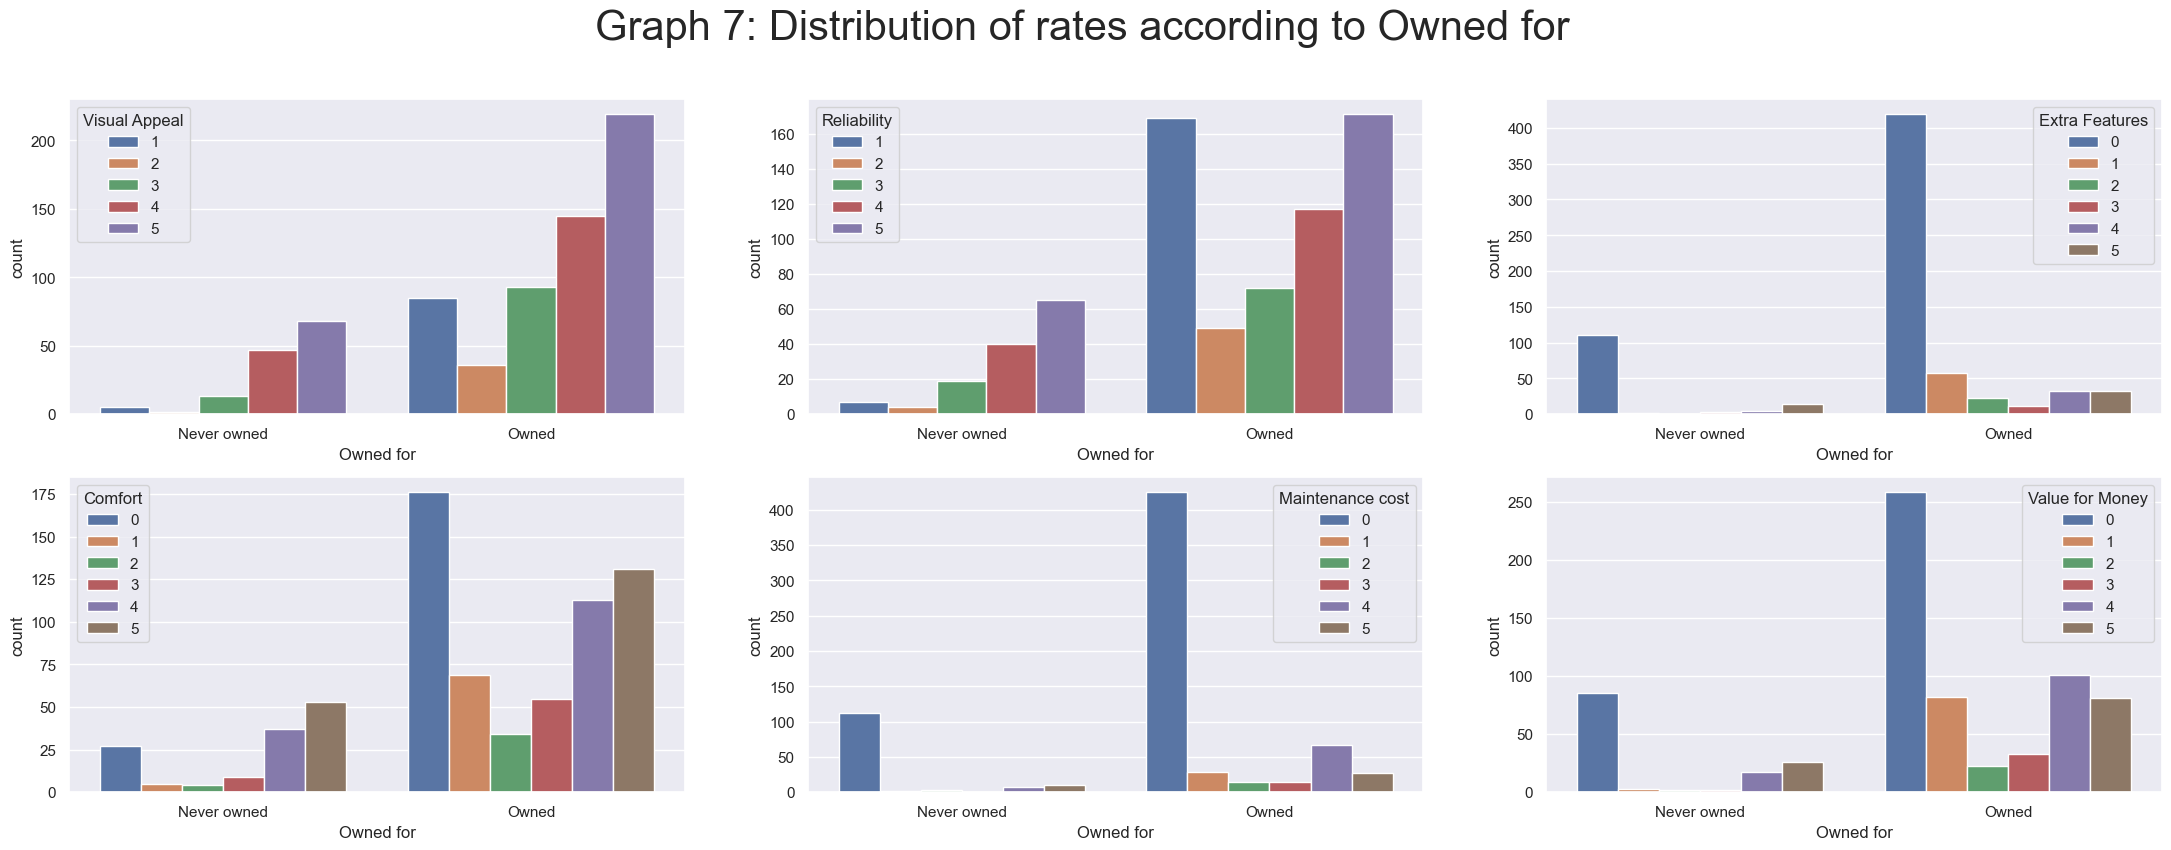

In [39]:
# Let's explore the behavior of the ratings
style.use('ggplot')
sns.set(font_scale=1)

fig, axes = plt.subplots(2,3,figsize=(27,9))
sns.countplot(x="Owned for",hue="Visual Appeal",data=moped,ax=axes[0,0])
sns.countplot(x="Owned for",hue="Reliability",data=moped,ax=axes[0,1])
sns.countplot(x="Owned for",hue="Extra Features",data=moped,ax=axes[0,2])

sns.countplot(x="Owned for",hue="Comfort",data=moped,ax=axes[1,0])
sns.countplot(x="Owned for",hue="Maintenance cost",data=moped,ax=axes[1,1])
sns.countplot(x="Owned for",hue="Value for Money",data=moped,ax=axes[1,2])

fig.suptitle("Graph 7: Distribution of rates according to Owned for",fontsize=30)
plt.show()

### Mean of ratings
Exploring the mean ratings in the next graph, I can observe that people who have never owned the moped product rated higher values.

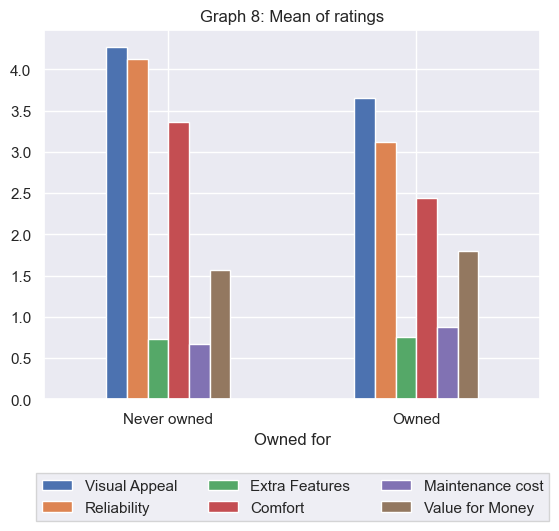

In [40]:
# Let's check mean ratings on Owned
df_mean_rating= moped.drop(columns= "Model Name").groupby("Owned for").mean()
df_mean_rating.plot(kind="bar")
plt.legend(loc= "lower center", bbox_to_anchor=(0.5, -0.35),
          ncol=3, fancybox=False)
plt.xticks(rotation="0")
plt.title("Graph 8: Mean of ratings")
plt.show()
# It looks that people who have never owned the moped is rating higher on most of categories

### Correlation of ratings by model names
The next graph was grouped by the Model Name, where I can see that there are few correlations with some columns.

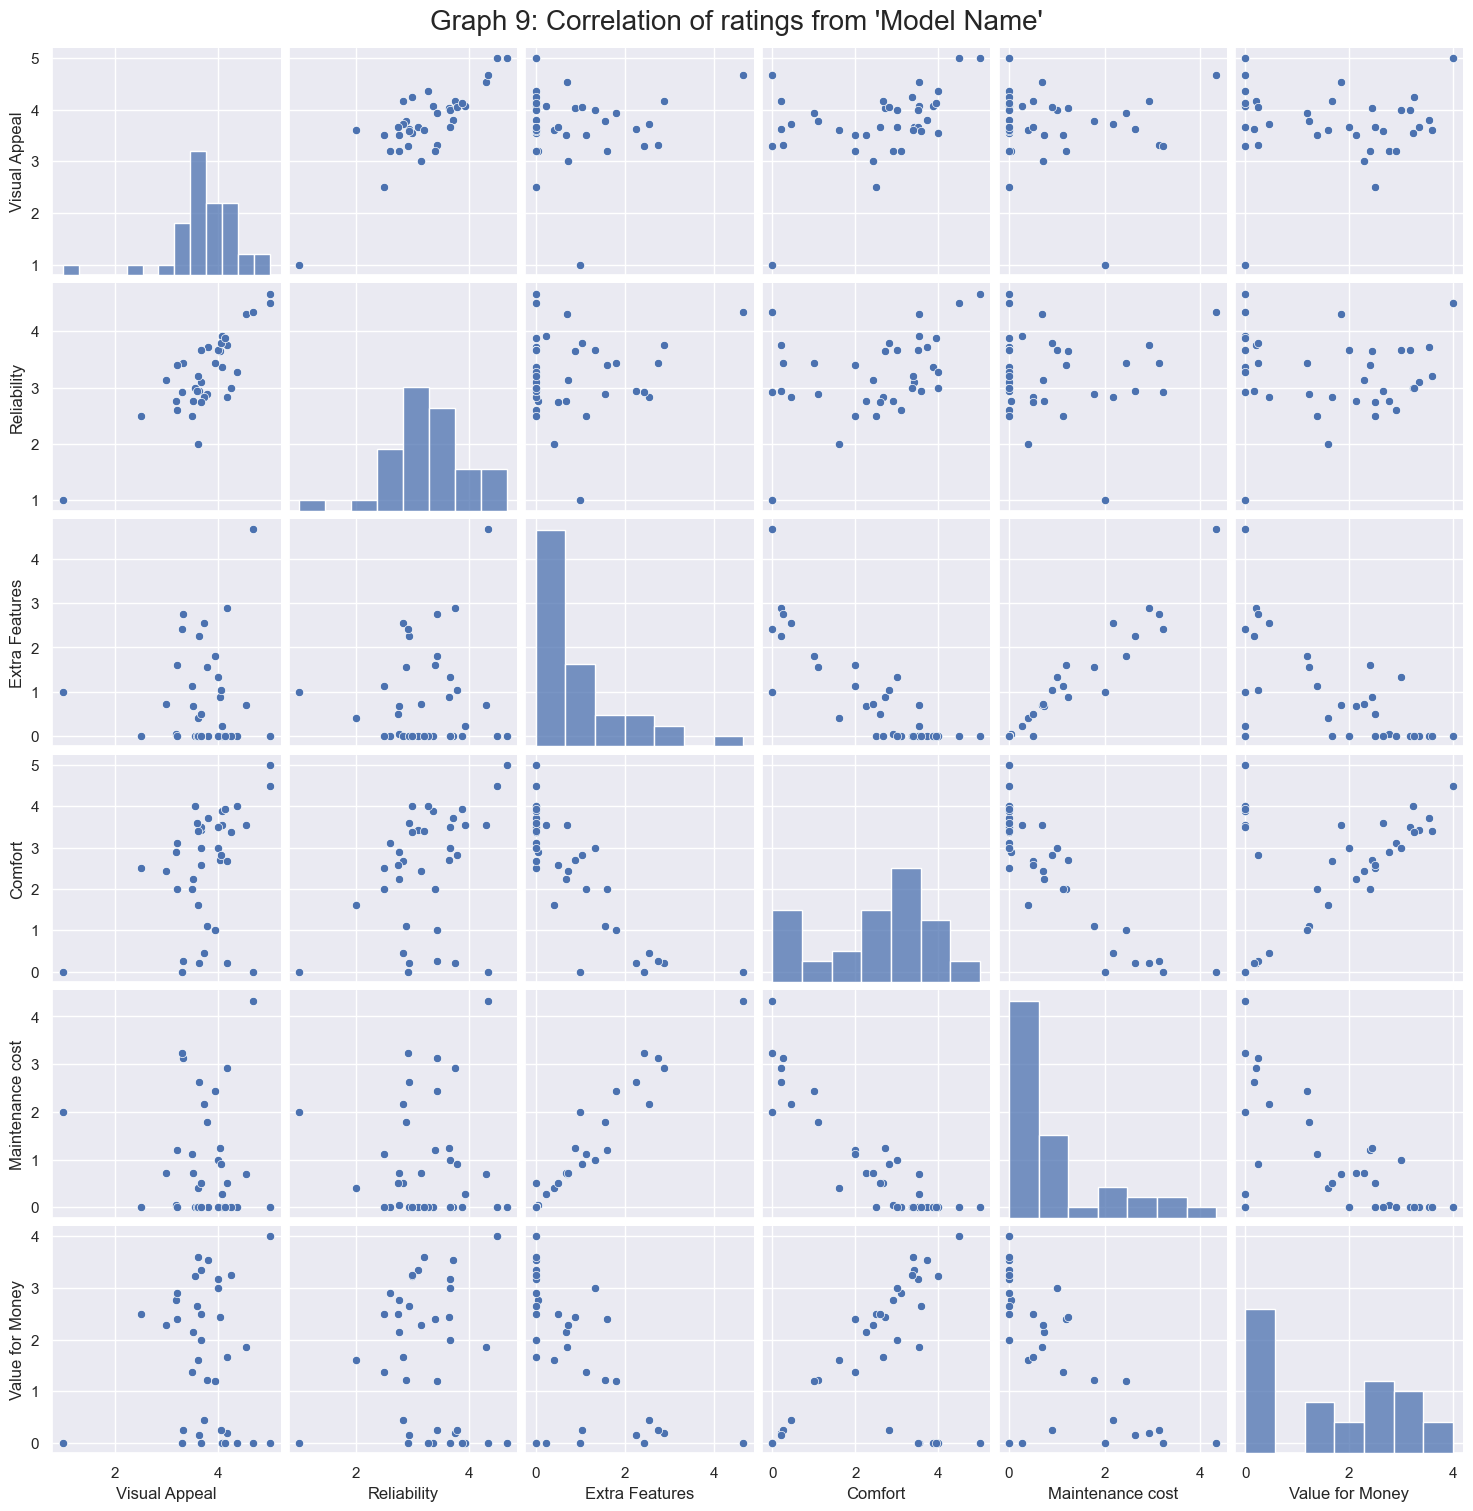

In [41]:
g = sns.pairplot(moped[["Model Name","Visual Appeal","Reliability", "Extra Features", "Comfort", "Maintenance cost",
                 "Value for Money"]].groupby("Model Name").mean())
g.fig.suptitle("Graph 9: Correlation of ratings from 'Model Name'", y=1.01, fontsize=20)
plt.show()

### Relationship of ratings
With this graph I want to see if there is a certain relationship where "non-owners" have more influence

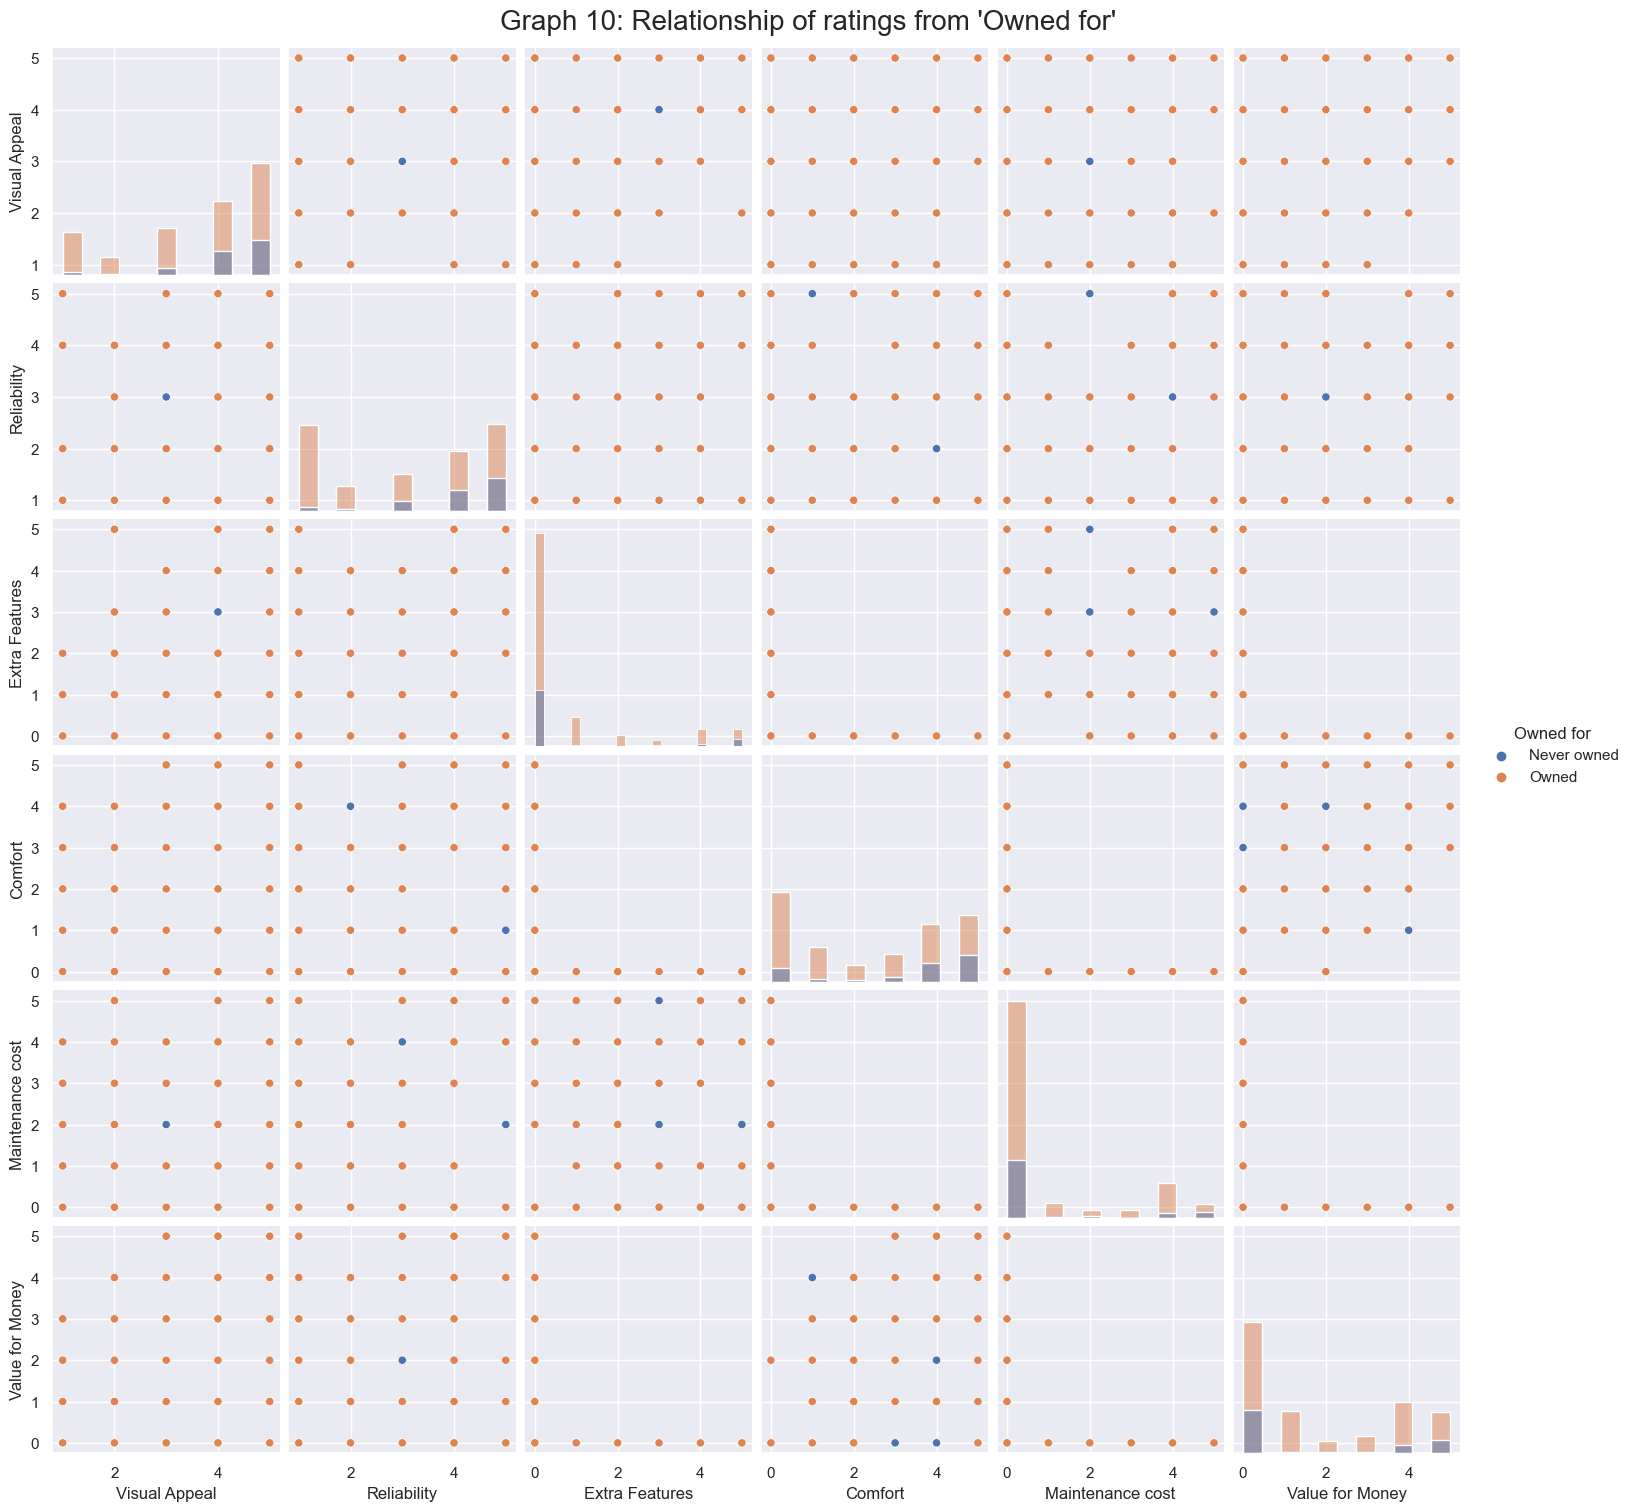

In [42]:
mp=moped[["Owned for","Visual Appeal", "Reliability", "Extra Features", "Comfort", "Maintenance cost", "Value for Money"]]
g = sns.pairplot(data=mp, hue="Owned for",diag_kind="hist")
g.fig.suptitle("Graph 10: Relationship of ratings from 'Owned for'", y=1.01,fontsize=20)
plt.show()

### Correlations of rating columns
Let's explore with numbers what columns have correlations, so let's perform a heatmap from our correlation matrix.

In [43]:
correlation = moped[["Model Name","Visual Appeal","Reliability", "Extra Features", "Comfort", "Maintenance cost",
                 "Value for Money"]].corr()

#### Heatmap of correlations
I can see in the graph that there are just some correlations:
1. Comfort and Value for Money.
2. Reliability and Comfort.
3. Visual Appeal and Comfort.
4. Visual Appeal and Reliability.
5. Since Extra Features and Maintenance cost have most missing values that correlation is misleading.

Note: The correlation makes sense coming from people who buy a moped. These ratings are commonly correlated.

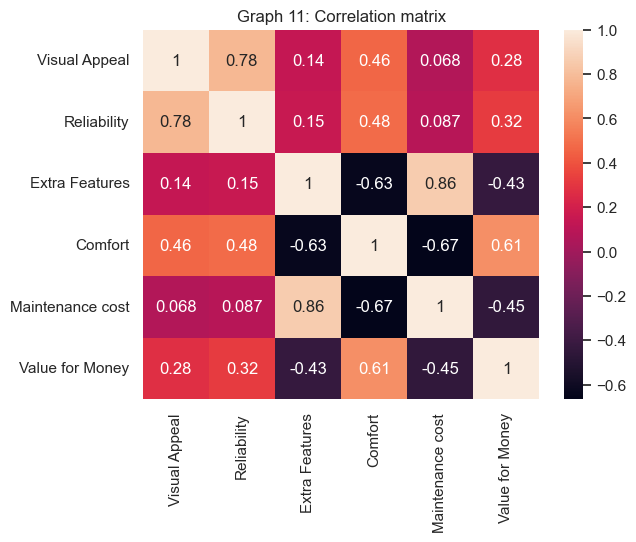

In [44]:
sns.heatmap(correlation, annot= True)
plt.title("Graph 11: Correlation matrix")
plt.show()

### Make changes to data to enable modeling
Since the beginning, I was asked to predict the ratings that were coming from people who have never owned the moped, so my task for Machine Learning is categorical. I need to prepare my dataframe to do this task.
1. Let's convert my categorical column "Owned for" into a binary column "Owners" where 0 = "non-owners" and 1 = "owners".
2. Let's convert my text column "Used it for" into a binary column "Commuting" where 0 = Leisure and 1 = Commuting.


Now, I just need to select my target labels and my feature labels where:

- X = My feature labels, the data which is going to feed my model to make predictions.
- y = My target labels, the data that I want to predict.

In [45]:
# Adding commiting to metrics
CMM = {"Commuting":1, 
      "Leisure":0,}
moped["Commuting"] = moped["Used it for"].map(CMM)
OB = {"Owned":1, 
      "Never owned":0}
moped["Owned"] = moped["Owned for"].map(OB)

# Selection of Feature and Target Labels
X = moped[["Visual Appeal","Reliability", "Extra Features", "Comfort", "Maintenance cost","Value for Money","Commuting"]]
y = moped["Owned"]

## Model Fitting

I am facing a classification problem. My goal is to predict the "non-owners", as follows: "non-owners" == 0 and "Owners" == 1.

My baseline model is Logistic Regression because it is very efficient and as a comparison model it is going to be a Decision Tree Classifier because it can capture non-linear relationships between features and labels. Also, the decision region isn't linear, in contrast the classification-tree produces rectangular decision regions in the feature space.


In [46]:
# Importing the models 
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
# Preprocessing module for scaling data
from sklearn.preprocessing import StandardScaler
# Split data into Train and Test module
from sklearn.model_selection import train_test_split

### Baseline model Logistic Regression

In [47]:
# For my Logistic Regression I need to scale the features
sc = StandardScaler()
X_scaled = sc.fit_transform(X)
# Spliting for Logistic Regression 70% train (Using stratify=y to handle the unbalanced data)
X_train_lr, X_test_lr, y_train_lr, y_test_lg = train_test_split(X_scaled, y, test_size=0.3, random_state=42, stratify=y)
#Instantiate the model
lr = LogisticRegression()
# Model Fitting
lr.fit(X_train_lr, y_train_lr)
# Prediction model
y_pred_proba_lr = lr.predict_proba(X_test_lr)[:,1]
y_pred_lr = lr.predict(X_test_lr)

### Comparison model

In [48]:
# Split for Decision Tree Classifier 70% train (Using stratify=y to handle the unbalanced data)
X_train_dt, X_test_dt, y_train_df, y_test_dt = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
#Instantiate the model
dt = DecisionTreeClassifier(criterion="gini",max_depth=14,random_state=42)
# Model Fitting
dt.fit(X_train_dt, y_train_df)
# Prediction model
y_pred_proba_dt = dt.predict_proba(X_test_dt)[:,1]
y_pred_dt = dt.predict(X_test_dt)

## Model Evaluation

I am evaluating with accuracy metric, because I want to measure the total number of true and false values predicted by the model and I am going to use the ROC curve to visualize the performance of the models and the area under the curve which is the overall accuracy of the classifier.

- **Logistic Regression**: Obtained an **accuracy score** of **0.82** where it was able to predict **15%** of **"non-owners"** and **98%** of **"Owners"** and **AUC = 0.72**
- **Decision Tree Classifier**: Obtained an **accuracy score** of **0.76** where it was able to predict **24%** of **"non-owners"** and **89%** of **"Owners"** and **AUC = 0.64**

From this outcome I can conclude that the **Logistic Regression Model performs better** than the Decision Tree Classifier model and has a higher chance to predict better "non-owners" and "owners" from the EMO data.

In [49]:
# Used Metrics to evaluate the models
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score

### Evaluation Baseline model Logistic Regression
1. Accuracy score: 0.8224
2. Classification Report as follows:
    - Non-Owners
 		- The precision is 0.67
    	- The recall is 0.15
	- Owners
		- The precision with Owners is 0.83  
    	- The recall is 0.98
3. Confusion Matrix TP and TN as follows:
	- Non-Owners: 6 of 41 
	- Owners: 170 of 173 
4. The AUC is 0.728

Accuracy Score
 0.822429906542056
Confusion Matrix
 [[  6  35]
 [  3 170]]
Clasification Report
               precision    recall  f1-score   support

  Non-Owners       0.67      0.15      0.24        41
      Owners       0.83      0.98      0.90       173

    accuracy                           0.82       214
   macro avg       0.75      0.56      0.57       214
weighted avg       0.80      0.82      0.77       214

AUC: 0.7284646834907654


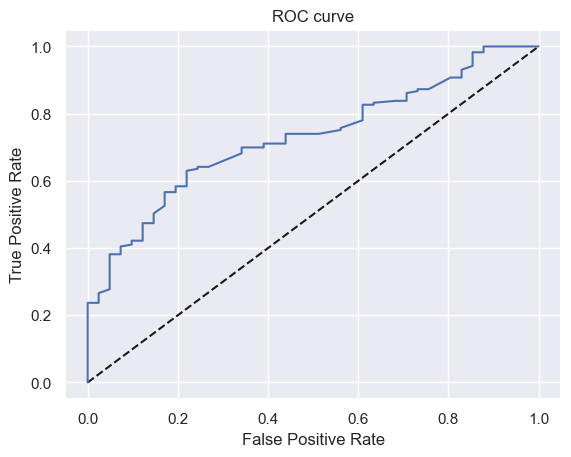

In [50]:
print("Accuracy Score\n", accuracy_score(y_test_lg, y_pred_lr))
print("Confusion Matrix\n", confusion_matrix(y_test_lg, y_pred_lr))
target_names = ["Non-Owners", "Owners"]
print("Clasification Report\n", classification_report(y_test_lg, y_pred_lr, target_names=target_names))
print("AUC: {}".format(roc_auc_score(y_test_lg, y_pred_proba_lr)))
# Generate ROC curve values
fpr, tpr, thresholds = roc_curve(y_test_lg, y_pred_proba_lr)
# Plot ROC curve
plt.plot([0,1], [0,1], "k--")
plt.plot(fpr, tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC curve")
plt.show()

### Evaluation of Comparison Model Decision Tree Classifier
1. Accuracy score: 0.76
2. Classification Report as follows:
    - Non-Owners
 		- The precision is 0.34
    	- The recall is 0.24
	- Owners
		- The precision with Owners is 0.83   
    	- The recall is 0.89
3. Confusion Matrix TP and TN as follows:
 	- 	Non-Owners: 10 of 41
 	- 	Owners: 154 of 173
4. The AUC is 0.64

Accuracy Score: 
 0.7663551401869159
Confusion Matrix: 
 [[ 10  31]
 [ 19 154]]
Clasification Report: 
               precision    recall  f1-score   support

  Non-Owners       0.34      0.24      0.29        41
      Owners       0.83      0.89      0.86       173

    accuracy                           0.77       214
   macro avg       0.59      0.57      0.57       214
weighted avg       0.74      0.77      0.75       214

AUC: 0.646270971380234


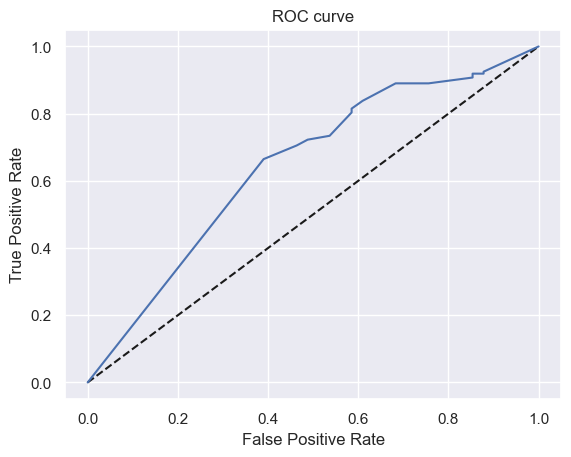

In [51]:
print("Accuracy Score: \n", accuracy_score(y_test_dt, y_pred_dt))
print("Confusion Matrix: \n", confusion_matrix(y_test_dt, y_pred_dt))
target_names = ["Non-Owners", "Owners"]
print("Clasification Report: \n", classification_report(y_test_dt, y_pred_dt, target_names=target_names))
print("AUC: {}".format(roc_auc_score(y_test_dt, y_pred_proba_dt)))
# Generate ROC curve values
fpr, tpr, thresholds = roc_curve(y_test_dt, y_pred_proba_dt)
# Plot ROC curve
plt.plot([0,1], [0,1], "k--")
plt.plot(fpr, tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC curve")
plt.show()

## ✅ When you have finished...
- Publish your Workspace using the option on the left
- Check the published version of your report:
	- Can you see everything you want us to grade?
    - Are all the graphics visible?
- Review grading rubric, have you included everything that will be graded?
- Head back to the [Certification Dashboard](https://app.datacamp.com/certification) to submit your practical exam